<a href="https://colab.research.google.com/github/Zivilevs/Data_Science_Projects/blob/main/Handwritten_digits_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Handwritten Digits

The MNIST database of handwritten digits. 

This database of images of handwritten digits will be used to build a classifier to determine which digit is in the image. 

We will start with the version of the MNIST dataset that is built into scikit-learn. This has the images with only 8 by 8 pixels, so they are blurry.



## Model for 0 and 1


To simplify the problem, we start by working with two digits (0 and 1), so we use the `n_class` parameter to limit the number of target values to 2.

In [1]:
from sklearn.datasets import load_digits

X, y = load_digits(n_class=2, return_X_y=True)

In [2]:
print(X.shape, y.shape)
print(X[0])
print(y[0])

# as image has 8 x 8 pixels we end up having 64 features. The value is on a grayscale where 0 is black and 16 is white. 

(360, 64) (360,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


To get a more intuitive view of the datapoint, reshape the array to be 8x8.

In [3]:
print(X[0].reshape(8, 8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


### Visualize the image

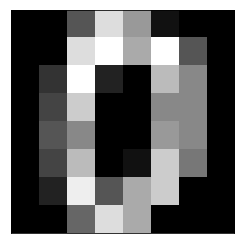

In [4]:
import matplotlib.pyplot as plt

plt.matshow(X[0].reshape(8, 8), cmap=plt.cm.gray)

plt.xticks(())  # remove x tick marks
plt.yticks(())  # remove y tick marks

plt.show()

### Build a model

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

mlp = MLPClassifier()

mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Let’s look at how the model predicts the first datapoint in the test set.

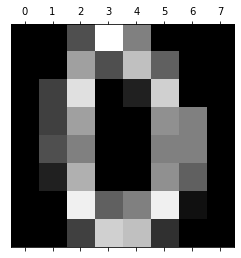

[0]


In [8]:
x = X_test[0]

plt.matshow(x.reshape(8, 8), cmap=plt.cm.gray)

#plt.xticks(())
plt.yticks(())

plt.show()

print(mlp.predict([x]))

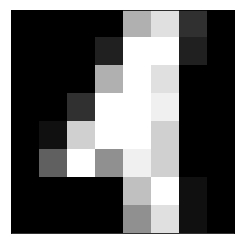

[1]


In [9]:
x = X_test[1]

plt.matshow(x.reshape(8, 8), cmap=plt.cm.gray)

plt.xticks(())
plt.yticks(())

plt.show()

print(mlp.predict([x]))

In [10]:
print("Accuracy:", mlp.score(X_test, y_test))

Accuracy: 1.0


## Model for 10 digits

In [12]:
X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

mlp = MLPClassifier(random_state=2)
mlp.fit(X_train, y_train)

print("Accuracy:",mlp.score(X_test, y_test))

Accuracy: 0.96


Let’s look at the ones we got incorrect. 

We use a numpy mask to pull out just the datapoints we got incorrect. We pull the x values, the true y value as well as the predicted value.

In [14]:
y_pred = mlp.predict(X_test)

incorrect = X_test[y_pred != y_test]
incorrect_true = y_test[y_pred != y_test]
incorrect_pred = y_pred[y_pred != y_test] 
incorrect

array([[ 0.,  0., 11., ...,  0.,  0.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  3., ..., 16., 16.,  3.],
       [ 0.,  0.,  2., ...,  3.,  0.,  0.],
       [ 0.,  1.,  7., ...,  6.,  0.,  0.]])

In [17]:
print(len(incorrect))

18


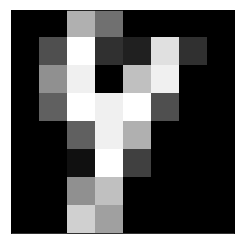

true value: 4
predicted value: 9


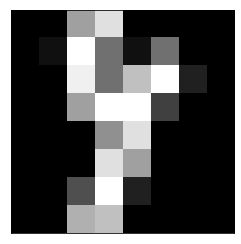

true value: 4
predicted value: 8


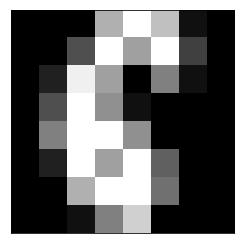

true value: 6
predicted value: 8


In [20]:
for j in range(3):
  plt.matshow(incorrect[j].reshape(8, 8), cmap=plt.cm.gray)
  
  plt.xticks(())
  plt.yticks(())
  plt.show()
  print("true value:", incorrect_true[j])
  print("predicted value:", incorrect_pred[j])